In [1]:
import pandas as pd

from surprise import Dataset, Reader, SVD, NMF, KNNBasic, SlopeOne, CoClustering
from surprise.model_selection import cross_validate, GridSearchCV

from statistics import mean

import matplotlib.pyplot as plt

In [2]:
# generated with the Ruby Mongoid command EventFeedback.where(:account_id.ne => nil, :event_id.ne => nil, :rating.ne => nil).each { |ef| puts "#{ef.account_id},#{ef.event_id},#{ef.rating}" }
ratings = pd.read_csv('data/ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5924 entries, 0 to 5923
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  5924 non-null   object
 1   event_id    5924 non-null   object
 2   rating      5924 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 139.0+ KB


In [3]:
ratings.head()

,account_id,event_id,rating
0,5e4e6e4112771b000483118c,5e4d75dffb11270006be7479,5
1,5d4923fd8c0e3e00100f50ed,5e4ea2fbbc4124000ec93d8b,5
2,5e4e6f8b12771b000483143a,5e4ea2fbbc4124000ec93d8b,5
3,5e74347ae86daf0004661556,5e9f0de11dbc32000e77e047,5
4,5e419dab706b15000430f4e1,5e9f14e31098da0009840bc1,5


Text(0, 0.5, 'Count')

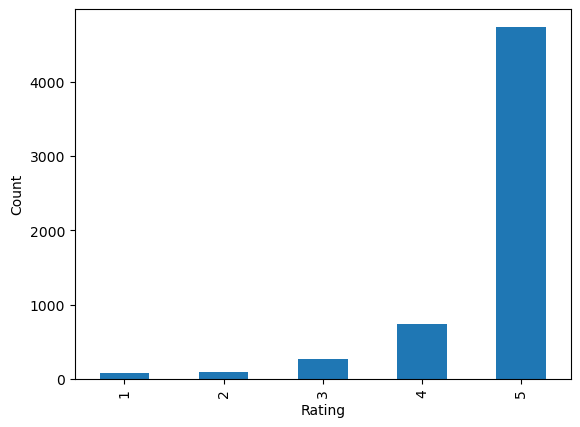

In [235]:
# bar chart of ratings
ratings['rating'].value_counts().sort_index().plot.bar()
# add title and axis labels
plt.xlabel('Rating')
plt.ylabel('Count')

In [4]:
# generated with the Ruby Mongoid command Event.where(:name.ne => nil, :start_time.ne => nil).each { |event| puts %{"#{event.id}","#{event.name}","#{event.start_time.to_date.to_fs(:db)}"} }
events = pd.read_csv('data/events.csv')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3044 non-null   object
 1   name    3044 non-null   object
 2   tags    2055 non-null   object
 3   date    3043 non-null   object
dtypes: object(4)
memory usage: 95.2+ KB


In [5]:
events.head()

,id,name,tags,date
0,5e4ea2fbbc4124000ec93d8b,Members' Social with Stephen Reid,NaN,2020-03-27
1,5edfba3873ca70000e3e5f91,Weekly Psychedelic Hangout,NaN,2020-06-10
2,5e4d75dffb11270006be7479,Headless Way: A Day with Richard Lang (Members...,NaN,2020-03-21
3,5e9d95b6e05bb5000405bf6b,Headless Way: Online Workshop with Richard Lang,NaN,2020-05-11
4,5e9d95b7e05bb5000405bf6c,Come Whine With Me,NaN,2020-04-30


In [226]:
# generated with the Ruby Mongoid command Ticket.where(:account_id.ne => nil).each { |ticket| puts "#{ticket.account_id},#{ticket.event_id}" }
tickets = pd.read_csv('data/tickets.csv')
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58959 entries, 0 to 58958
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  58959 non-null  object
 1   event_id    58959 non-null  object
dtypes: object(2)
memory usage: 921.4+ KB


In [207]:
tickets.head()

,account_id,event_id
0,586d2eb3cc88ff00093f21e5,5eb7ef16c81bf400137a7c95
1,586d2eb3cc88ff00093f21e5,5eb95d012aaa15000ed9ab97
2,586d2eb3cc88ff00093f21e5,5ebd83ddba390800093afe12
3,586d2eb3cc88ff00093f21e5,5ed7e1da43d68f0010599e79
4,586d2eb3cc88ff00093f21e5,5edccb76ff8d2c000a3253d8


In [208]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)

algos = [KNNBasic, SVD, NMF, SlopeOne, CoClustering]
results = {}
for algo in algos:
  print(algo)
  cv = cross_validate(algo(), data, measures=['RMSE'])
  results[algo.__name__] = {'RMSE': mean(cv['test_rmse']), 'fit_time': mean(cv['fit_time'])}

pd.DataFrame.from_dict(results)

<class 'surprise.prediction_algorithms.knns.KNNBasic'>
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
<class 'surprise.prediction_algorithms.matrix_factorization.SVD'>
<class 'surprise.prediction_algorithms.matrix_factorization.NMF'>
<class 'surprise.prediction_algorithms.slope_one.SlopeOne'>
<class 'surprise.prediction_algorithms.co_clustering.CoClustering'>


,KNNBasic,SVD,NMF,SlopeOne,CoClustering
RMSE,0.758654,0.729952,0.933324,0.782013,0.802260
fit_time,0.208254,0.068669,0.337110,0.065167,0.485396


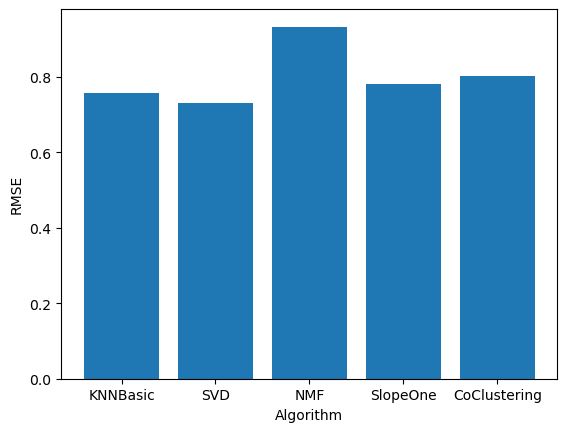

In [209]:
# plot average RMSE
plt.bar(range(len(results)), [x['RMSE'] for x in results.values()])
plt.xticks(range(len(results)), list(results.keys()))
# add labels
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.show()

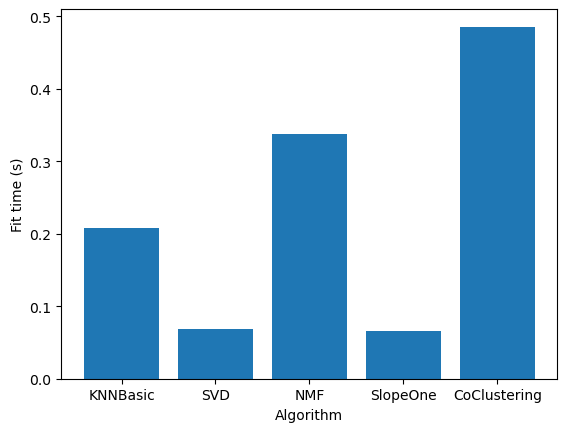

In [210]:
# plot average fit_time
plt.bar(range(len(results)), [x['fit_time'] for x in results.values()])
plt.xticks(range(len(results)), list(results.keys()))
# add labels
plt.xlabel('Algorithm')
plt.ylabel('Fit time (s)')
plt.show()

In [211]:
# defaults = {'n_epochs': [20], 'lr_all': [0.005], 'reg_all': [0.02]}
param_grid = {'n_epochs': [10, 20, 50], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.01, 0.02, 0.05]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'])
grid_search.fit(data)

# print best RMSE score
print(grid_search.best_score['rmse'])
# print combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])

0.7237060827682019
{'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.02}


In [212]:
svd = grid_search.best_estimator["rmse"]
trainset = data.build_full_trainset()
svd.fit(trainset)
anti_testset = trainset.build_anti_testset()
anti_predictions = svd.test(anti_testset)

In [227]:
# get account with most ratings
account_id = ratings['account_id'].value_counts().idxmax()
# get predictions for this account
account_predictions = [pred for pred in anti_predictions if pred.uid == account_id]
# consider only future events
time_threshold = pd.to_datetime('today') - pd.DateOffset(months=1)
account_predictions = [pred for pred in account_predictions if pd.to_datetime(events[events['id'] == pred.iid]['date'].values[0]) > time_threshold]
# consider only events the account has not attended
account_predictions = [pred for pred in account_predictions if pred.iid not in tickets[tickets['account_id'] == account_id]['event_id'].values]
# sort account_predictions by estimated rating
account_predictions.sort(key=lambda x: x.est, reverse=True)
# print top 10
for pred in account_predictions[:10]:
  event = events[events['id'] == pred.iid]  
  print(event['name'].values[0], event['date'].values[0], round(pred.est, 2))

Re-Creation: Psychedelics & Festivals 2023-08-02 4.94
Psychedelic Gong Bath (Round Chapel) 2023-07-10 4.89
Belonging 2023-07-19 4.85
Gong Meditation - 7th August 2023-08-07 4.84
Vibrating Under One Moon - A Journey of Self Discovery Through Song, Sound and Voice with Terra Cósmica 2023-07-27 4.8
Introduction To Somatics 2023-09-05 4.77
Agua Terra Gathering : A Restorative Festival to Connect with Self, Community & Nature 2023-07-27 4.76
Kundalini Yoga, Cacao and Harmonising Sound Journey 2023-07-16 4.72
Gong Meditation - 24th July 2023-07-24 4.71
Wim Hof Method Fundamentals - London 2023-07-29 4.69
